<a href="https://colab.research.google.com/github/hp482/cs634-final-project/blob/master/hpolishook_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check Configuration



In [0]:
# show the VM configuration to verifiy we've got a GPU image
import tensorflow as tf

from tensorflow import keras

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())



# Mount Google Drive to Colab VM (Run when VM needs drive access)

In [0]:
import zipfile
from google.colab import drive
print("Working...")
drive.mount('/content/drive/', force_remount=True)

Working...
Mounted at /content/drive/


# Unzip Images (Run once per session)

In [1]:
#helper function to unzip images into google drive
#uploading images one-by-one takes far too long
#this unzips the zip file which is hosted on google drive onto the local space of the VM
#the VM drive is ephemeral, so this must be done once per session
import zipfile
from google.colab import drive
print("Working...")
drive.mount('/content/drive/')
zip_ref = zipfile.ZipFile("/content/drive/My Drive/new_images.zip", 'r')
zip_ref.extractall("/")
zip_ref.close()
print("Done...")

Working...
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Done...


In [61]:
# watch out for hidden debug directories appearing and creating additional classifications
# this script will remove them 
!ls -a /images/test/
!echo    
!ls -a /images/train/
!echo    
!rm -d /images/test/.ipynb_checkpoints/
!echo    
!rm -d /images/train/.ipynb_checkpoints/
!echo    
!rm -d /images/.ipynb_checkpoints/
!echo    
!ls -a /images/test/
!echo    
!ls -a /images/train/




 .   'Candy Canes'	 Ornaments  'Santa Hats'
 ..  'Christmas Trees'	 Presents    Stockings

 .   'Candy Canes'	 Ornaments  'Santa Hats'
 ..  'Christmas Trees'	 Presents    Stockings

rm: cannot remove '/images/test/.ipynb_checkpoints/': No such file or directory

rm: cannot remove '/images/train/.ipynb_checkpoints/': No such file or directory

rm: cannot remove '/images/.ipynb_checkpoints/': No such file or directory

 .   'Candy Canes'	 Ornaments  'Santa Hats'
 ..  'Christmas Trees'	 Presents    Stockings

 .   'Candy Canes'	 Ornaments  'Santa Hats'
 ..  'Christmas Trees'	 Presents    Stockings


# Helper Functions (run once every session if using test_model)



In [0]:
# TensorFlow and tf.keras
# TensorFlow and tf.keras
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

######################################################################################################################################################
# displays a test images and the models expected and the actual categories. 
def plot_image(i, predictions_array, true_label, img, class_names):
  #predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
######################################################################################################################################################
# Plots a bar chart of the models calulated probabilties of each category with the  predicted and actual category marked
def plot_value_array(i, predictions_array, true_label, label_list):
  #predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(6), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  def preview_25_images(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(Images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[Labels[i]])
    plt.show()

# Train Model Functions

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from google.colab import drive
import matplotlib.pyplot as plt

######################################################################################################################################################
# Simple swtich between model setup functions found in the Model Definition section
def setup_model(model_number):

    if  (model_number) == 1:
      model,name=  setup_model1()                  
    elif  (model_number) == 2: 
      model , name = setup_model2()                 
    elif  (model_number) == 3: 
      model , name = setup_model3()                 
    elif  (model_number) == 4: 
      model , name = setup_model4()                 
    
    else:
      print ("Bad model selected")
      quit();
    return model,name
######################################################################################################################################################
# Train a model for the given number of epoch.
def train_model(model_number,epochs):
  print(tf.__version__)

  # force use of GPU
  #with tf.device('/device:GPU:0'): 
  
  
  # create a data generator  
  # 80/20 split between train and validation images 
  datagen  = ImageDataGenerator(rescale=(1./255),  validation_split=0.2)
  ImageDir  = "/images/"



  # load the image iterators
  my_train_images = datagen.flow_from_directory(ImageDir +'train/', class_mode='binary', batch_size=64, color_mode='rgb',subset='training' ,target_size=(124, 124))
  my_validation_images = datagen.flow_from_directory(ImageDir +'train/', class_mode='binary', batch_size=64, color_mode='rgb',subset='validation',target_size=(124, 124))



  model, name = setup_model(model_number)

  #print(my_train_images.class_indices)

  inverted_dict = dict(map(reversed, my_train_images.class_indices.items()))
  print(inverted_dict)


  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])


  
  model.fit(my_train_images ,steps_per_epoch=200,  epochs=epochs , validation_data = my_validation_images,validation_steps =200)
  
  # Save the model to the attached Google Drive

  # serialize the model to JSON
  model_json = model.to_json()

  drive.mount('/content/drive/')
  modelPath = "/content/drive/My Drive/"
  with open(modelPath+ name+ "_model.json", "w") as json_file:
      json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights(modelPath+ name+"_model.h5")
  print("Saved model to disk")

######################################################################################################################################################
def test_model(model_number):
    
    ImageDir  = "/images/"
    
    datagen = ImageDataGenerator(rescale=(1. / 255))
    my_test_images = datagen.flow_from_directory(ImageDir + 'test/', class_mode='binary', batch_size=64,
                                                 color_mode='rgb',target_size=(124, 124))
    
    model, name = setup_model(model_number)  # we really only need the name from this function

    test_images, test_classification = my_test_images.next()
    inverted_dict = dict(map(reversed, my_test_images.class_indices.items()))
    
    print(inverted_dict)
       
    
    # load saved model from json and create model
    modelPath = "/content/drive/My Drive/"
    json_file = open(modelPath+  name+ '_model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = keras.models.model_from_json(loaded_model_json)
    
    # load weights into new model
    loaded_model.load_weights(modelPath+  name+ "_model.h5")
    print("Loaded model from disk")

    loaded_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # predict the category of the first 15 test images
    probability_model = tf.keras.Sequential([loaded_model,tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    

    # Display the  first 15 test images, their predicted category, and the true category.
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)

      plot_image(i, predictions[i],test_classification[i] ,test_images[i], inverted_dict )

      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], int(test_classification[i]), inverted_dict)
    plt.tight_layout()
    plt.show()





#Model Definitions

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from google.colab import drive
import matplotlib.pyplot as plt

######################################################################################################################################################
def setup_model1():
  # this worked pretty well, the simplest
  model = keras.Sequential()
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(6))
  
  name = "Model1"
 
  return model,name
######################################################################################################################################################
def setup_model2():
    # try a model with several Convolution layers
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), padding='same',input_shape=(124,124,3)))
    model.add(keras.layers.Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6))
    model.add(Activation('softmax'))

    name = "Model2"
    return model, name
######################################################################################################################################################
def setup_model3():
  # simpler version only one convulution layer
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32, (3, 3), padding='same',input_shape=(124,124,3)))
  model.add(keras.layers.Activation('relu'))
  model.add(Flatten())
  model.add(Activation('relu'))
  model.add(Dense(6))
  model.add(Activation('softmax'))

  name = "Model3"
  return model, name

######################################################################################################################################################
def setup_model4():
    
  model = keras.Sequential()
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(6, activation='softmax'))


  name = "Model4"
  return model, name


# Work Space

Found 96 images belonging to 6 classes.
{0: 'Candy Canes', 1: 'Christmas Trees', 2: 'Ornaments', 3: 'Presents', 4: 'Santa Hats', 5: 'Stockings'}
Loaded model from disk


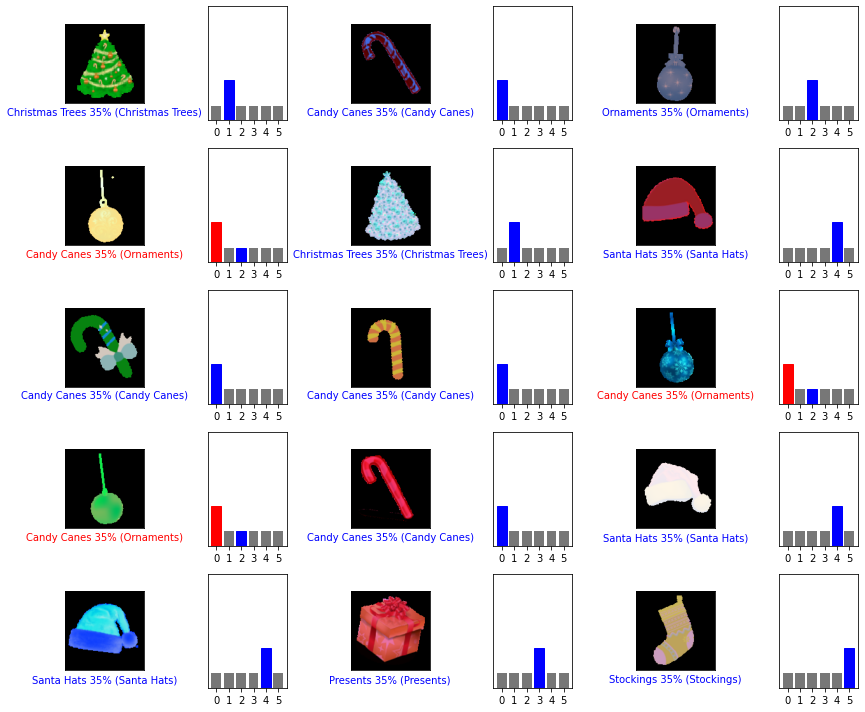

In [88]:
test_model(2)




In [84]:


train_model(4,10)


#


2.2.0-rc3
Found 9504 images belonging to 6 classes.
Found 2376 images belonging to 6 classes.
{0: 'Candy Canes', 1: 'Christmas Trees', 2: 'Ornaments', 3: 'Presents', 4: 'Santa Hats', 5: 'Stockings'}
Epoch 1/10
121/200 [=================>............] - ETA: 5s - loss: 1.4969 - accuracy: 0.5386

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


200/200 [==============================] - 27s 136ms/step - loss: 1.4062 - accuracy: 0.6313 - val_loss: 1.1214 - val_accuracy: 0.9218
Epoch 2/10
200/200 [==============================] - 27s 133ms/step - loss: 1.1930 - accuracy: 0.8510 - val_loss: 1.1115 - val_accuracy: 0.9315
Epoch 3/10
200/200 [==============================] - 26s 132ms/step - loss: 1.1606 - accuracy: 0.8834 - val_loss: 1.1189 - val_accuracy: 0.9236
Epoch 4/10
200/200 [==============================] - 26s 132ms/step - loss: 1.1518 - accuracy: 0.8922 - val_loss: 1.1227 - val_accuracy: 0.9203
Epoch 5/10
200/200 [==============================] - 27s 136ms/step - loss: 1.1421 - accuracy: 0.9016 - val_loss: 1.1128 - val_accuracy: 0.9305
Epoch 6/10
200/200 [==============================] - 26s 132ms/step - loss: 1.1430 - accuracy: 0.9008 - val_loss: 1.1115 - val_accuracy: 0.9319
Epoch 7/10
200/200 [==============================] - 27s 134ms/step - loss: 1.1397 - accuracy: 0.9062 - val_loss: 1.1074 - val_accuracy: 0.9